<ipython-input-1-7fbee98ea0d0>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = ts.resample('M').mean()


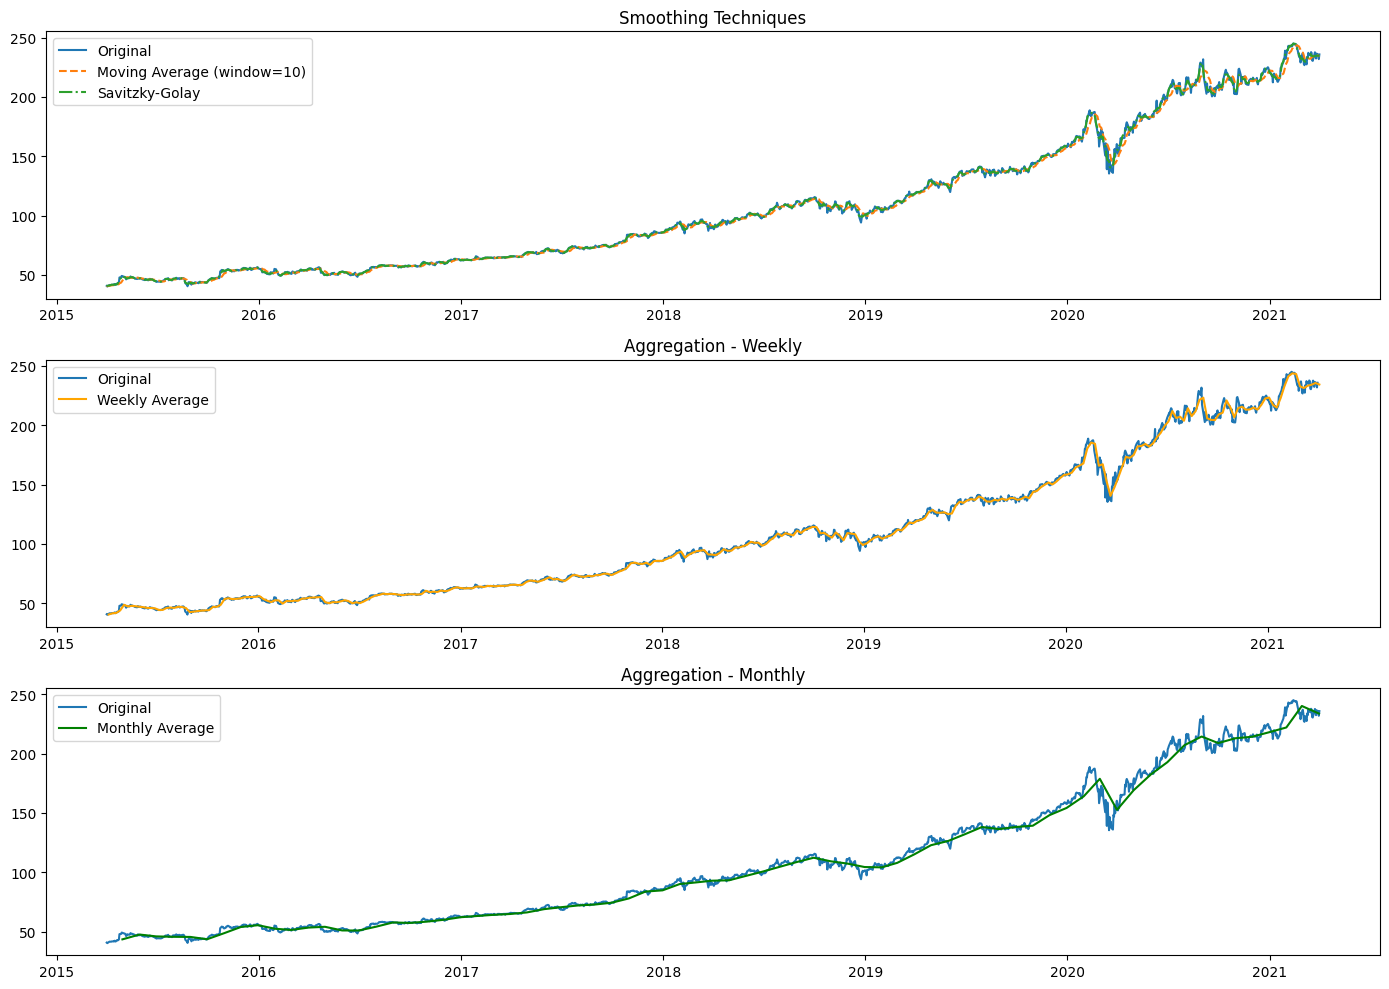

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

df = pd.read_csv("/content/Microsoft_Stock.csv", parse_dates=["Date"])
df.sort_values("Date", inplace=True)
df.set_index("Date", inplace=True)

ts = df['Close']


weekly_avg = ts.resample('W').mean()
monthly_avg = ts.resample('M').mean()


ts_ma = ts.rolling(window=10, min_periods=1).mean()

ts_savgol = savgol_filter(ts, window_length=11, polyorder=2)


plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
plt.plot(ts, label='Original')
plt.plot(ts_ma, label='Moving Average (window=10)', linestyle='--')
plt.plot(ts.index, ts_savgol, label='Savitzky-Golay', linestyle='-.')
plt.title("Smoothing Techniques")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(ts, label='Original')
plt.plot(weekly_avg, label='Weekly Average', color='orange')
plt.title("Aggregation - Weekly")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(ts, label='Original')
plt.plot(monthly_avg, label='Monthly Average', color='green')
plt.title("Aggregation - Monthly")
plt.legend()

plt.tight_layout()
plt.show()